# Stock Close Price Comparison

Comparing the percentage change of the daily and monthly stock close price of Apple, Google, Microsoft, and Netflix between February to May 2023 to identify trends in the percentage change on different timeframes.

In [34]:
#importing python packages
import pandas as pd 
import matplotlib.pyplot as plt

In [35]:
#importing data
df = pd.read_csv('/kaggle/input/stock-price-action-data-set/stocks.csv', parse_dates = ['Date'], index_col = 'Date')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.5+ KB


In [37]:
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [38]:
#Date Range Minimum
df.index.min()

Timestamp('2023-02-07 00:00:00')

In [39]:
#Date Range Maximum
df.index.max()

Timestamp('2023-05-05 00:00:00')

In [40]:
# AAPL close price ranges
df[df['Ticker']== 'AAPL'].agg(['min','max'])

,Ticker,Open,High,Low,Close,Adj Close,Volume
min,AAPL,144.38,146.71,143.90,145.31,145.31,41516200.0
max,AAPL,170.98,174.30,170.76,173.57,173.57,113316400.0


In [41]:
# MSFT close price ranges
df[df['Ticker']== 'MSFT'].agg(['min','max'])

,Ticker,Open,High,Low,Close,Adj Close,Volume
min,MSFT,246.55,250.93,245.61,246.27,246.27,17150300.0
max,MSFT,307.76,311.97,305.15,310.65,310.65,69527400.0


In [42]:
# NFLX close price ranges
df[df['Ticker']== 'NFLX'].agg(['min','max'])

,Ticker,Open,High,Low,Close,Adj Close,Volume
min,NFLX,287.34,297.45,285.33,292.76,292.76,2657900.0
max,NFLX,372.41,373.83,361.74,366.83,366.83,22128300.0


In [43]:
# GOOG close price ranges
df[df['Ticker']== 'GOOG'].agg(['min','max'])

,Ticker,Open,High,Low,Close,Adj Close,Volume
min,GOOG,89.54,90.13,88.86,89.35,89.35,16732000.0
max,GOOG,107.80,109.63,107.59,109.46,109.46,97798600.0


There is a large difference betwee the min and max close prices of the stocks in the dataset. It would be best to compare the percentage change of the stock close prices in the allotted timeframe of the dataset.

In [44]:
#Subsetting dataframes
AAPL = df[df['Ticker']== 'AAPL']
GOOG = df[df['Ticker']== 'GOOG']
NFLX = df[df['Ticker']== 'NFLX']
MSFT = df[df['Ticker']== 'MSFT']

In [45]:
#Deleting Ticker column from new dataframes 
del AAPL['Ticker']
del GOOG['Ticker']
del NFLX['Ticker']
del MSFT['Ticker']

In [46]:
# Creating new dataframes and setting day frequency
AAPL_d = AAPL.resample('D').asfreq()
GOOG_d = GOOG.resample('D').asfreq()
NFLX_d = NFLX.resample('D').asfreq()
MSFT_d = MSFT.resample('D').asfreq()

In [61]:
#Adding 'Close_Pct_Change' column to each dataframe
AAPL_d['Close_Pct_Change'] = round(AAPL_d['Close'].pct_change().fillna(0),2)
GOOG_d['Close_Pct_Change'] = round(GOOG_d['Close'].pct_change().fillna(0),2)
NFLX_d['Close_Pct_Change'] = round(NFLX_d['Close'].pct_change().fillna(0),2)
MSFT_d['Close_Pct_Change'] = round(MSFT_d['Close'].pct_change().fillna(0),2)

In [55]:
# Creating new dataframes and setting monthly frequency
AAPL_m = round(AAPL.resample('M').mean(),2)
GOOG_m = round(GOOG.resample('M').mean(),2)
NFLX_m = round(NFLX.resample('M').mean(),2)
MSFT_m = round(MSFT.resample('M').mean(),2)

In [59]:
# Adding 'Close_Pct_Change' column to each dataframe
AAPL_m['Close_Pct_Change'] = round(AAPL_m['Close'].pct_change().fillna(0),2) 
GOOG_m['Close_Pct_Change'] = round(GOOG_m['Close'].pct_change().fillna(0),2) 
NFLX_m['Close_Pct_Change'] = round(NFLX_m['Close'].pct_change().fillna(0),2) 
MSFT_m['Close_Pct_Change'] = round(MSFT_m['Close'].pct_change().fillna(0),2) 

In [76]:
NFLX_m

,Open,High,Low,Close,Adj Close,Volume,Close_Pct_Change
Date,,,,,,,
2023-02-28,346.34,350.77,340.49,345.11,345.11,6207666.67,0.00
2023-03-31,312.41,318.22,307.39,312.60,312.60,6850234.78,-0.09
2023-04-30,334.09,337.57,329.01,333.74,333.74,6736026.32,0.07
2023-05-31,322.92,325.94,317.39,320.90,320.90,4518500.00,-0.04


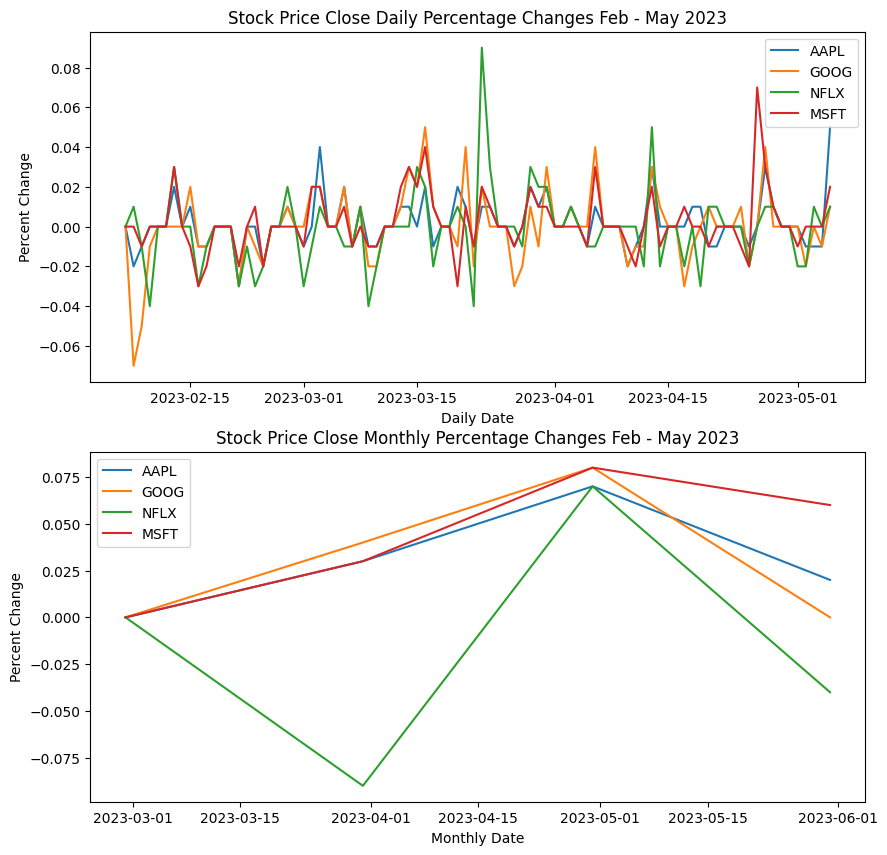

In [80]:
#Creating a subplot figure
fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))

# Plotting Daily Pct Change
ax[0].plot(AAPL_d['Close_Pct_Change'],label = 'AAPL')
ax[0].plot(GOOG_d['Close_Pct_Change'],label = 'GOOG')
ax[0].plot(NFLX_d['Close_Pct_Change'],label = 'NFLX')
ax[0].plot(MSFT_d['Close_Pct_Change'],label = 'MSFT')

# Labeling Daily Pct Change
ax[0].set_xlabel('Daily Date')
ax[0].set_ylabel('Percent Change')
ax[0].set_title('Stock Price Close Daily Percentage Changes Feb - May 2023')
ax[0].legend()

# Plotting Monthly Pct Change
ax[1].plot(AAPL_m['Close_Pct_Change'],label = 'AAPL')
ax[1].plot(GOOG_m['Close_Pct_Change'],label = 'GOOG')
ax[1].plot(NFLX_m['Close_Pct_Change'],label = 'NFLX')
ax[1].plot(MSFT_m['Close_Pct_Change'],label = 'MSFT')

# Labeling Daily Pct Change
ax[1].set_xlabel('Monthly Date')
ax[1].set_ylabel('Percent Change')
ax[1].set_title('Stock Price Close Monthly Percentage Changes Feb - May 2023')
ax[1].legend()


# Displaying visualization
plt.show()

There is a correlation between the trend in positive and negative percentage close percenatge changes on both the daily and monthly stock price close percent changes